# Hacktiv8-PTP Python For Data Science // S.8.1 // Advanced Visualization

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

In [ ]:
#Datasets:
#Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data

In [3]:
#kalau belum install : !conda install -c anaconda xlrd --yes
df_can = pd.read_excel('C:/Users/W I N D O W S/Downloads/Hacktiv8 2022/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 51)


In [6]:
#Bersihkan data. Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita. Lihat Basic Visualization, Line Plots and Area Plots, Histograms, dan Bar Plots untuk penjelasan rinci tentang preprocessing ini.

# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 46)


## Visualizing Data using Matplotlib

In [7]:
#import matplotlib
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


## Waffle Charts (Optional)

In [8]:
#Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progress menuju tujuan. Waffle Chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor Excel.
# let's create a new dataframe for these three countries 
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]

# let's take a look at our dataframe
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3901.0
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2327.0
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5866.0


In [9]:
#Sayangnya, tidak seperti R, waffle charts tidak built in dalam pustaka visualisasi Python mana pun. Oleh karena itu, kita akan belajar cara membuatnya dari awal.

#Step 1. Langkah pertama untuk membuat waffle adalah menentukan proporsi setiap kategori sehubungan dengan totalnya.
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


In [10]:
#Step 2. Langkah kedua adalah menentukan ukuran keseluruhan dari waffle chart.
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


In [11]:
#Step 3. Langkah ketiga adalah menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori
# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


In [12]:
#Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 ubin, Norwegia akan menempati 77 ubin, dan Swedia akan menempati 194 ubin.

In [13]:
#Step 4. Langkah keempat adalah membuat matriks yang menyerupai wafel dan mengisinya.
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [14]:
#Mari kita lihat tampilan matriksnya.
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

In [15]:
#Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori sesuai dengan jumlah ubin yang dialokasikan untuk setiap kategori.

<Figure size 432x288 with 0 Axes>

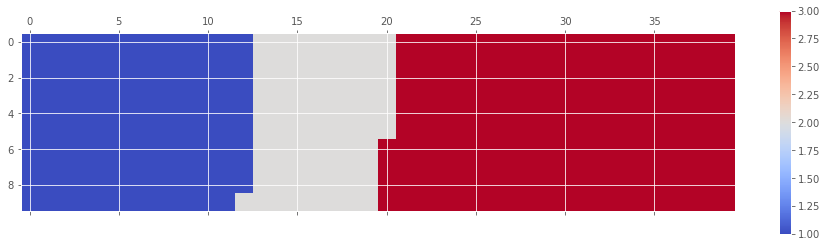

In [16]:
#Step 5. Petakan matriks waffle chart menjadi visual.

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], [])

<Figure size 432x288 with 0 Axes>

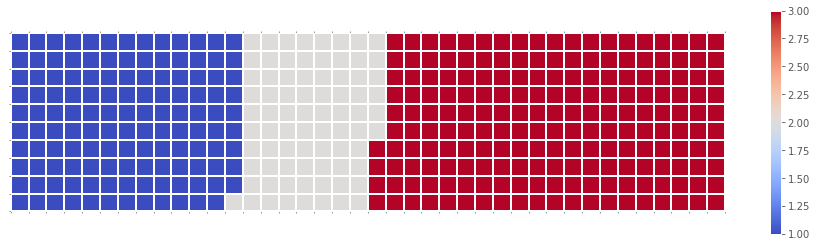

In [17]:
#Step 6. Percantik chart

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

<Figure size 432x288 with 0 Axes>

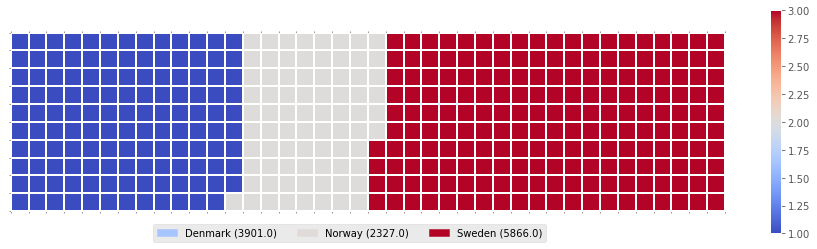

In [18]:
#Step 7. Tambahkan legend

# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

In [19]:
#Sekarang akan sangat tidak efisien untuk mengulangi ketujuh langkah ini setiap kali kita ingin membuat waffle. Jadi mari kita gabungkan ketujuh langkah menjadi satu fungsi yang disebut create_waffle_chart. Fungsi ini akan mengambil parameter berikut sebagai masukan:
#categories: Unique categories or classes in dataframe.
#values: Values corresponding to categories or classes.
#height: Defined height of waffle chart.
#width: Defined width of waffle chart.
#colormap: Colormap class
#value_sign: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.

In [20]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [21]:
#Sekarang untuk membuat waffle, yang harus kita lakukan adalah memanggil fungsi create_waffle_chart. Mari tentukan parameter input:

width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

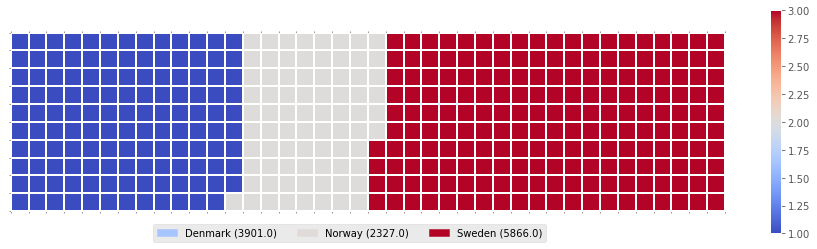

In [22]:
#Dan sekarang mari kita panggil fungsi kita untuk membuat waffle.

create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

In [23]:
#Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.

#Untungnya, sebuah package sudah ada di Python untuk menghasilkan word clouds. Package bernama word_cloud dikembangkan oleh Andreas Mueller. Kalian dapat mempelajari lebih lanjut tentang paket dengan mengikuti link ini : https://github.com/amueller/word_cloud/.

#Mari gunakan package ini untuk mempelajari cara menghasilkan word cloud untuk dokumen teks tertentu.

In [24]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

# kalau belum install : !pip install wordcloud

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [25]:
#Word clouds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. Secara bersamaan, mari kita keluar dari kumpulan data imigrasi dan bekerja dengan contoh yang melibatkan analisis data teks. Mari kita coba menganalisis novel pendek karangan Lewis Carroll berjudul Alice's Adventures in Wonderland. Ayo lanjutkan dan unduh file .txt dari novel.

# download file and save as alice_novel.txt
# !wget --quiet
# https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt

# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()
    
print ('File downloaded and saved!')

File downloaded and saved!


In [26]:
#Selanjutnya, mari gunakan stopwords yang kita impor dari word_cloud. Kita menggunakan set untuk menghapus stopword yang berlebihan.
stopwords = set(STOPWORDS)

In [27]:
#Buatword cloud object dan generate word cloud. Agar lebih ringkas, mari kita buat word cloud hanya dengan menggunakan 2000 kata pertama dalam novel.

# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

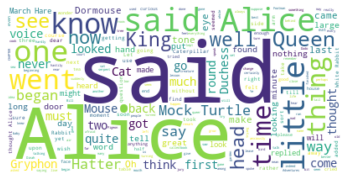

In [28]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

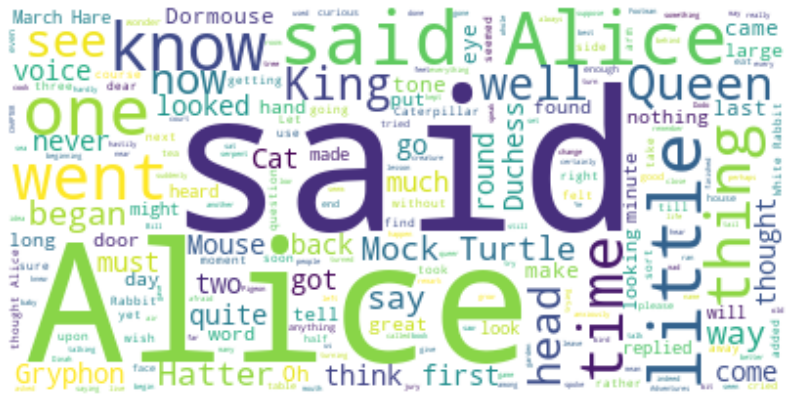

In [29]:
#Menarik! Jadi di 2000 kata pertama dalam novel, kata yang paling umum adalah Alice, said, little, went dan seterusnya. Mari ubah ukuran cloud sehingga kita dapat melihat kata-kata yang jarang digunakan dengan lebih baik.
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

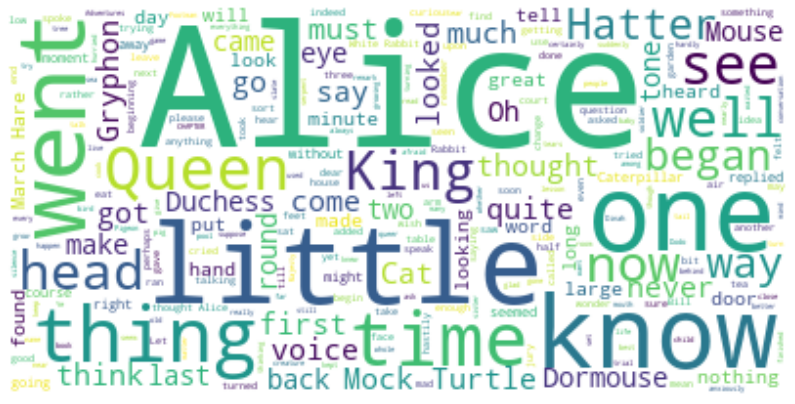

In [30]:
#Jauh lebih baik! Namun, said bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita dan buat ulang cloud.
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
#Hal keren lainnya yang dapat kalian terapkan dengan package word_cloudadalah melapiskan kata-kata ke mask dalam bentuk apa pun. Mari kita gunakan mask Alice dan kelincinya. Kami sudah membuatkan mask untuk kalian, jadi mari lanjutkan dan unduh dan beri nama alice_mask.png.

# download image
# !wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png
    
# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


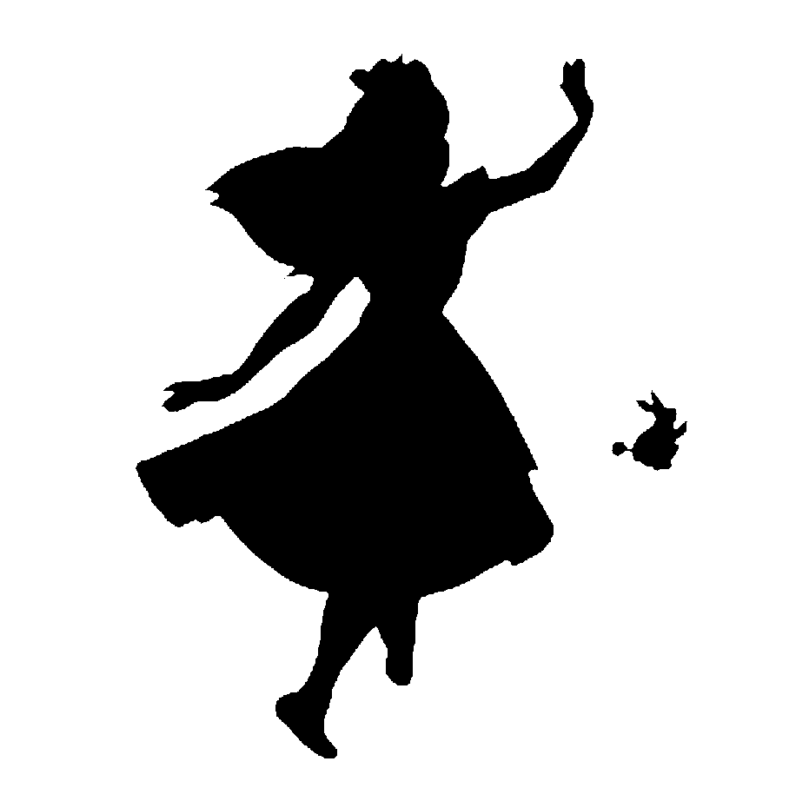

In [32]:
#Mari kita lihat bagaimana maskingnya terlihat.

fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

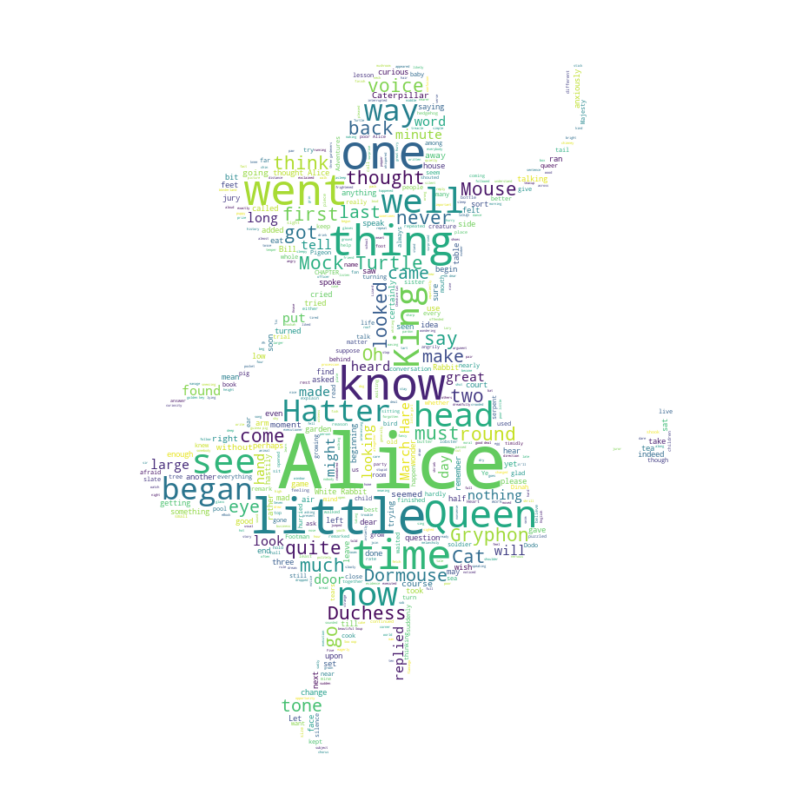

In [33]:
#Membentuk word cloud sesuai dengan masking sangat mudah menggunakan word_cloud . Agar simple, kita akan terus menggunakan 2000 kata pertama dalam novel.

# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
#Sayangnya data keimigrasian kita tidak memiliki data teks apapun, tapi dimana ada kemauan pasti ada jalan. Mari kita buat contoh data teks dari dataset imigrasi kita, katakanlah data teks 90 kata.
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [35]:
#Dan berapa total imigrasi dari 1980 hingga 2013?
total_immigration = df_can['Total'].sum()
total_immigration

6409153.0

In [36]:
#Menggunakan countries dengan nama satu kata, mari kita duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.
max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [37]:
#Kita tidak berurusan dengan stopwords apa pun di sini, jadi tidak perlu passing saat membuat kata cloud.

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


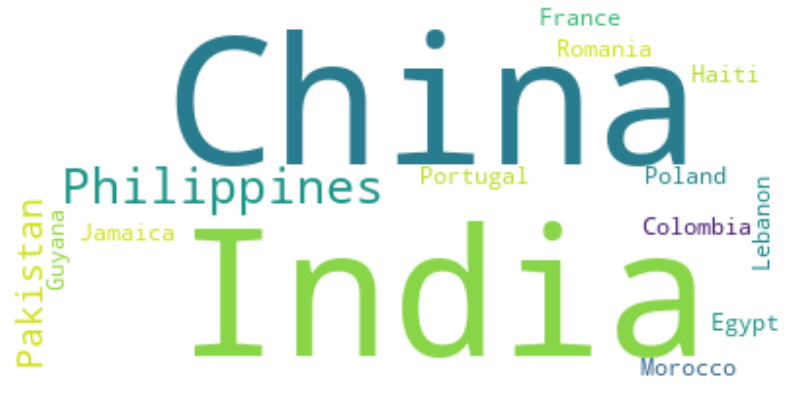

In [38]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Menurut word cloud di atas, sepertinya mayoritas orang yang berimigrasi berasal dari salah satu dari 15 negara yang ditampilkan oleh word cloud. Satu visual keren yang bisa kalian bangun, mungkin menggunakan peta Kanada dan masking dan melapiskan word cloud di atas peta Kanada. Itu akan menjadi visual yang menarik untuk dibangun!

## Regression Plots

In [39]:
#Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
#You can learn more about seaborn by following this link https://seaborn.pydata.org/ and more about seaborn regression plots by following this link http://seaborn.pydata.org/generated/seaborn.regplot.html

# install seaborn
# !pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')


Seaborn installed and imported!


In [40]:
#Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013.

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


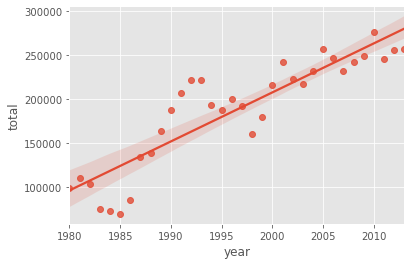

In [41]:
#Dengan seaborn, membuat plot regresi semudah memanggil fungsi regplot
ax = sns.regplot(x='year', y='total', data=df_tot)

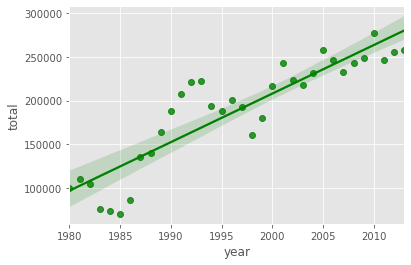

In [42]:
#Kita juga dapat menyesuaikan warna scatter plot dan garis regresi. Mari kita ubah warnanya menjadi hijau.
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

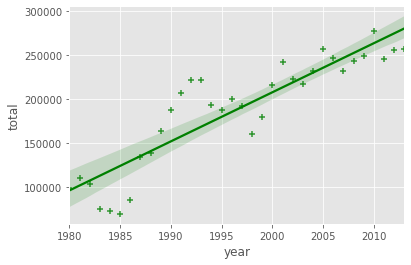

In [43]:
#Kita selalu dapat menyesuaikan bentuk marker, jadi sebagai ganti circular markers, mari gunakan '+'.
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

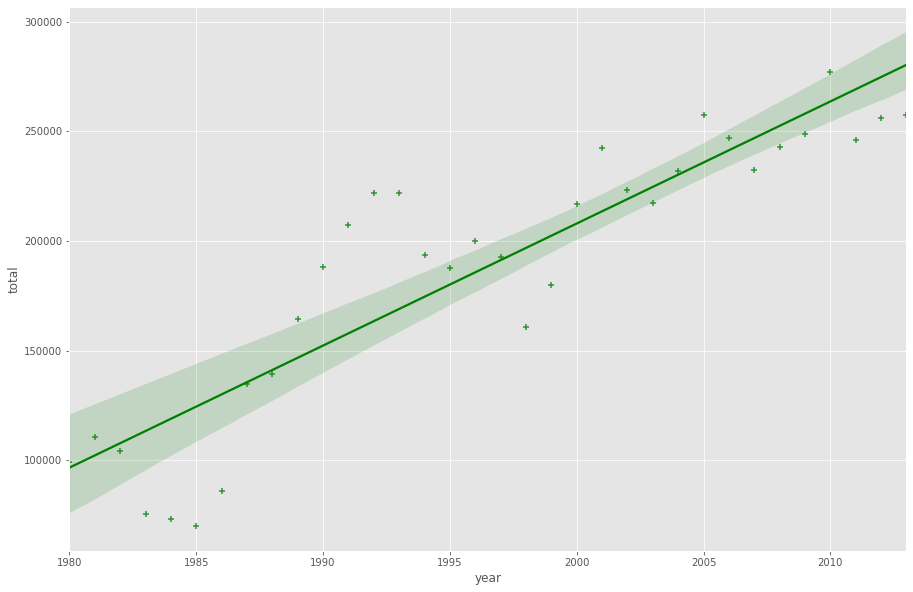

In [44]:
#Mari kita perbesar plotnya sedikit sehingga lebih menarik untuk dilihat.
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

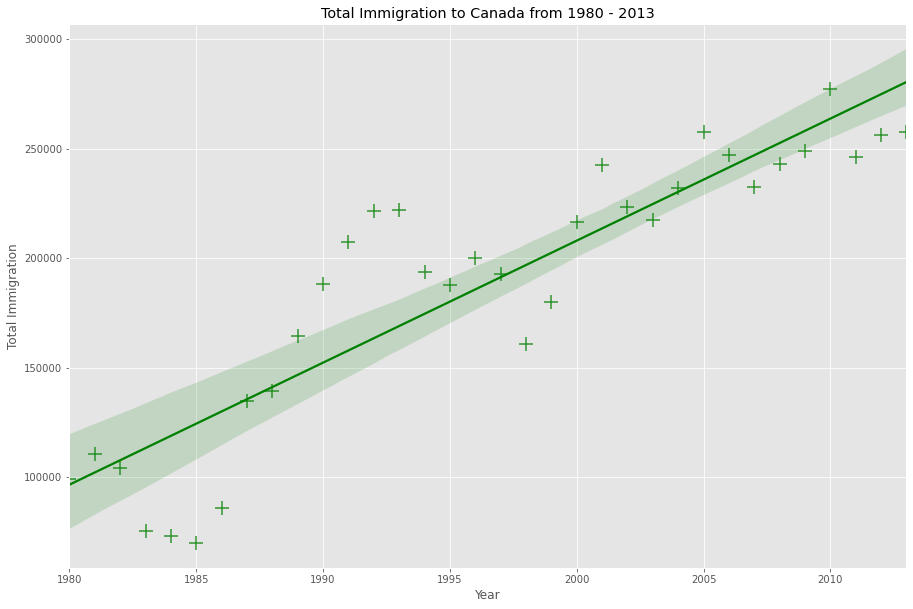

In [45]:
#Dan mari kita tingkatkan ukuran marker sehingga cocok dengan ukuran baru dari gambar tersebut, dan tambahkan judul serta label x dan y.
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

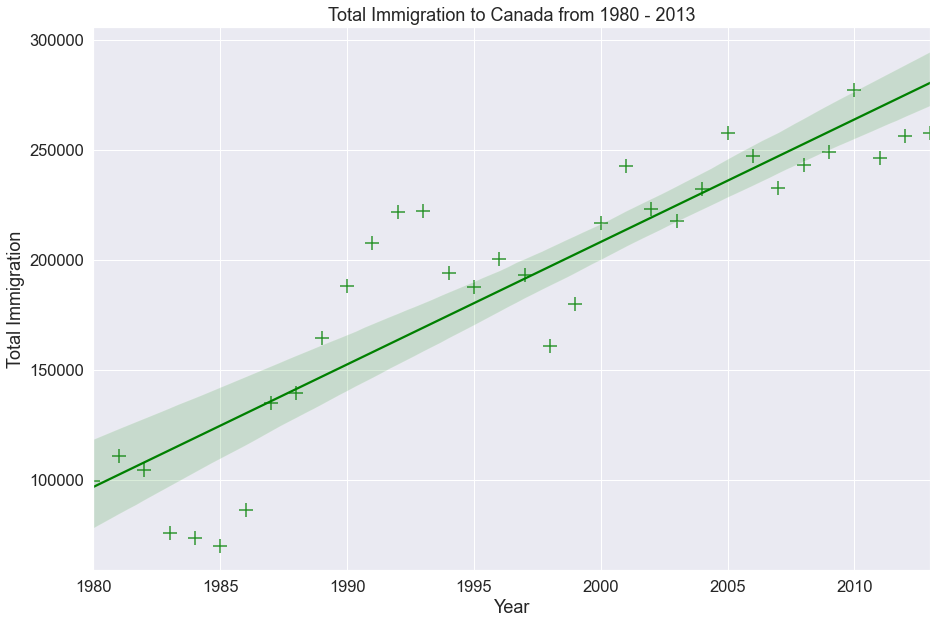

In [46]:
#Dan terakhir, tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar tidak terlihat berbeda!
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

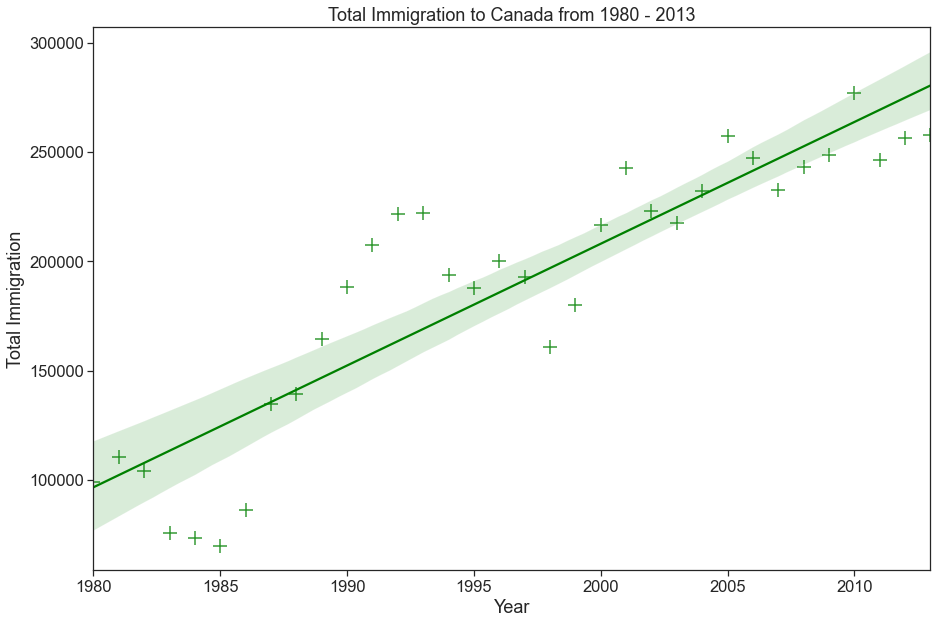

In [47]:
#Jika bukan penggemar background ungu, kalian dapat dengan mudah mengubah gaya ke latar belakang polos putih.
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

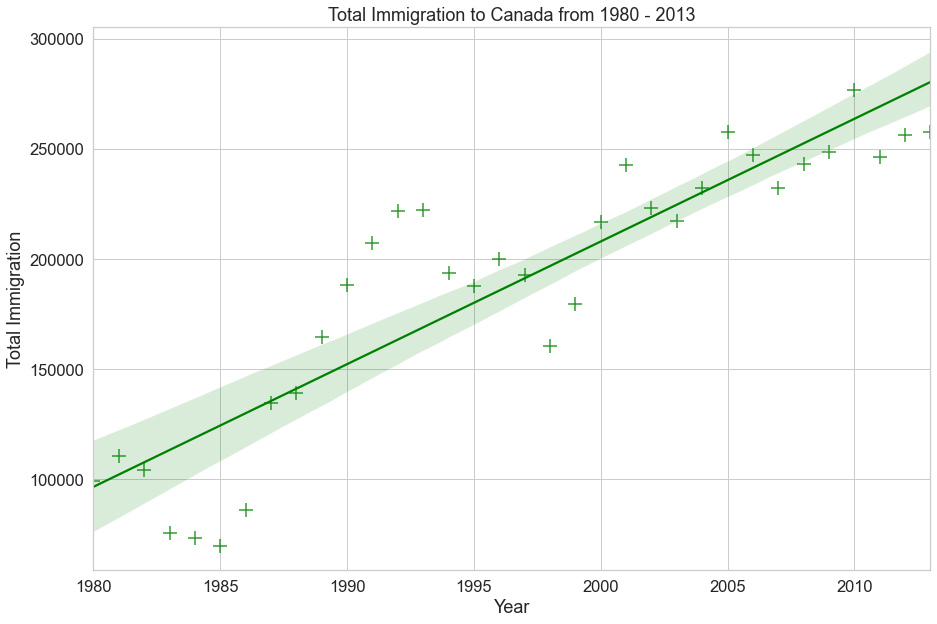

In [48]:
#Atau ke latar belakang putih dengan garis kisi/grid lines.

plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

##### Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

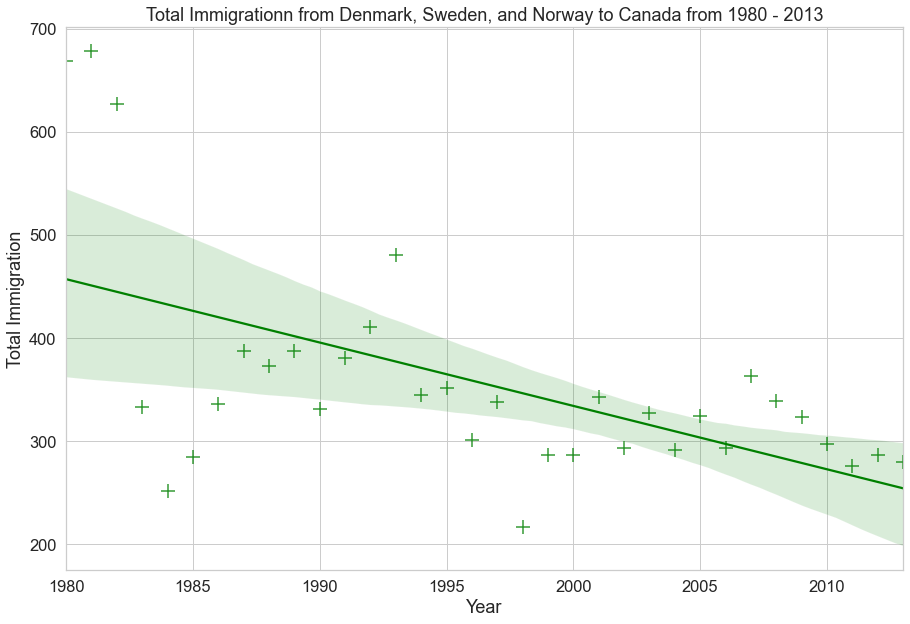

In [49]:
### type your answer here
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
# reset index in place
df_total.reset_index(inplace=True)
# rename columns
df_total.columns = ['year', 'total']
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
# define figure size
plt.figure(figsize=(15, 10))
# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')


## Folium

In [ ]:
#pustaka visualisasi Python lain, yaitu Folium. Keuntungan dari Folium adalah bahwa Folium dikembangkan dengan tujuan untuk memvisualisasikan data geospasial. Meskipun pustaka lain tersedia untuk memvisualisasikan data geospasial, seperti plotly, pustaka tersebut mungkin memiliki batasan pada berapa banyak panggilan API yang dapat kalian lakukan dalam kerangka waktu yang ditentukan. Folium adalah pustaka Python andal yang membantu kalian membuat beberapa jenis peta Leaflet. Fakta bahwa hasil Folium bersifat interaktif membuat perpustakaan ini sangat berguna untuk pembuatan dasbor.

#Datasets:
# San Francisco Police Department Incidents for the year 2016 - Police Department Incidents from San Francisco public data portal. Incidents derived from San Francisco Police Department (SFPD) Crime Incident Reporting system. Updated daily, showing data for the entire year of 2016. Address and location has been anonymized by moving to mid-block or to an intersection.
# Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries - The 2015 revision from United Nation's website. The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. For this lesson, we will focus on the Canadian Immigration data

In [ ]:
#More about folium:
# Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.
# Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.
# The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

In [50]:
#Import Primary Modules:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [51]:
#Folium tidak tersedia secara default. Jadi, kita harus menginstalnya terlebih dahulu sebelum dapat mengimpornya.

#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install folium
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [52]:
#Membuat peta dunia sangat mudah di Folium. Kalian cukup membuat objek Map Folium dan kemudian menampilkannya. Hal yang menarik dari peta Folium adalah peta tersebut interaktif, sehingga kalian dapat memperbesar setiap wilayah yang diinginkan meskipun pada tingkat zoom awal.

# define the world map
world_map = folium.Map()

# display world map
world_map

In [53]:
#Kalian dapat menyesuaikan definisi default peta dunia ini dengan menentukan pusat peta kalian dan tingkat zoom awal.
#Semua lokasi di peta ditentukan oleh nilai Lintang dan Bujurnya masing-masing. Jadi kalian dapat membuat peta dan melewati di tengah nilai Lintang dan Bujur [0, 0].
#Untuk pusat yang ditentukan, kalian juga dapat menentukan tingkat zoom awal ke lokasi itu saat peta dirender. Semakin tinggi tingkat zoom peta semakin diperbesar ke tengah.
#Mari buat peta yang berpusat di sekitar Semarang dan mainkan dengan tingkat zoom untuk melihat bagaimana pengaruhnya terhadap peta yang dibuat.

# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# display world map
world_map

In [54]:
#Mari buat peta lagi dengan tingkat zoom yang lebih tinggi

# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# display world map
world_map

##### Question: Create a map of Hacktiv8 with a zoom level of 15.

In [55]:
### type your answer here
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
# display world map
world_map

### A. Stamen Toner Maps

In [56]:
#Stamen Toner adalah peta B+W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.

#Mari buat peta Stamen Toner Semarang dengan tingkat zoom 13.

# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

# display map
world_map

In [ ]:
#Jangan ragu untuk memperbesar dan memperkecil peta untuk melihat bagaimana gaya ini dibandingkan dengan gaya default.

### B. Stamen Terrain Maps

In [57]:
#Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

#Mari buat peta Stamen Terrain Semarang dengan tingkat zoom 13.

# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

# display map
world_map

## Maps with Markers

In [58]:
#Mari unduh dan mengimpor data police department incidents menggunakan method pandas read_csv().
df_incidents = pd.read_csv('C:/Users/W I N D O W S/Downloads/Hacktiv8 2022/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [59]:
#Mari kita lihat lima item pertama dalam dataset kita.
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [ ]:
#Jadi setiap baris terdiri dari 13 fitur:
# IncidntNum: Incident Number
# Category: Category of crime or incident
# Descript: Description of the crime or incident
# DayOfWeek: The day of week on which the incident occurred
# Date: The Date on which the incident occurred
# Time: The time of day on which the incident occurred
# PdDistrict: The police department district
# Resolution: The resolution of the crime in terms whether the perpetrator was arrested or not
# Address: The closest address to where the incident took place
# X: The longitude value of the crime location
# Y: The latitude value of the crime location
# Location: A tuple of the latitude and the longitude values
# PdId: The police department ID

In [60]:
#Mari kita cari tahu berapa banyak entri di kumpulan data kita.
df_incidents.shape

(150500, 13)

In [61]:
#Jadi dataframe kita terdiri dari 150.500 kejahatan, yang terjadi pada tahun 2016. Untuk mengurangi computational cost, mari kita bekerja dengan hanya 100 insiden pertama dalam kumpulan data ini.

# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [62]:
#Mari kita konfirmasikan bahwa dataframe kita sekarang hanya terdiri dari 100 kejahatan.
df_incidents.shape

(100, 13)

In [63]:
#Sekarang setelah kita sedikit mengurangi datanya, mari kita visualisasikan dimana kejahatan terjadi di kota San Francisco. Kita akan menggunakan gaya default dan kita akan menginisialisasi tingkat zoom ke 12.

# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [64]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [65]:
#Sekarang mari kita taruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group dengan fitur dan gayanya sendiri, lalu menambahkannya ke sanfran_map.

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [66]:
#Kalian juga dapat menambahkan beberapa teks pop-up yang akan ditampilkan saat kalian mengarahkan kursor ke atas marker. Mari buat setiap penanda menampilkan kategori kejahatan saat diarahkan ke atas marker.

# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [67]:
#Sekarang kita dapat mengetahui kategori kejahatan apa yang terjadi di setiap marker.
#Jika kita menyadari peta menjadi sangat padat akan semua marker ini, ada dua solusi untuk masalah ini. Solusi yang lebih sederhana adalah dengan menghapus marker lokasi ini dan menambahkan teks ke marker lingkaran itu sendiri sebagai berikut:


# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

In [ ]:
#Solusi lain yang tepat adalah dengan mengelompokkan marker ke dalam cluster yang berbeda. Setiap cluster kemudian diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat kalian analisis secara terpisah.

#Untuk mengimplementasikannya, kita mulai dengan membuat instance objek MarkerCluster dan menambahkan semua titik data di dataframe ke objek ini.

In [69]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [ ]:
#Perhatikan bagaimana saat kalian memperkecil sepenuhnya, semua marker dikelompokkan ke dalam satu cluster, cluster global, dari 100 marker atau kejahatan, yang merupakan jumlah total kejahatan dalam dataframe kita. Setelah kalian mulai memperbesar, cluster global akan mulai dibagi menjadi beberapa cluster yang lebih kecil. Memperbesar sepenuhnya akan menghasilkan marker individual.

## Choropleth Maps

In [71]:
#Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberikan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah. Di bawah ini adalah peta Choropleth AS yang menggambarkan populasi dengan mil persegi per negara bagian.
#Sekarang, mari buat peta Choropleth dunia kita sendiri yang menggambarkan imigrasi dari berbagai negara ke Canada.

#Pertama-tama, unduh dan impor kumpulan data imigrasi Kanada utama kita sebelumnya menggunakan metode pandas read_excel(). Biasanya, sebelum kita bisa melakukannya, kita perlu mengunduh modul yang dibutuhkan panda untuk dibaca di file excel. Modul ini xlrd.
#!conda install -c anaconda xlrd --yes

#Download dataset dan tampilkan kedalam pandas dataframe:
df_can = pd.read_excel('C:/Users/W I N D O W S/Downloads/Hacktiv8 2022/Canada.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [72]:
#Mari kita lihat lima item pertama dalam dataset kita.
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Mari kita cari tahu berapa banyak entri di kumpulan data kita.

# print the dimensions of the dataframe
print(df_can.shape)

(195, 51)


In [74]:
#Bersihkan data. Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita. Lihat Basic Visualization, Line Plots and Area Plots, Histograms, dan Bar Plots untuk penjelasan rinci tentang preprocessing ini.

# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 47)


In [75]:
#Mari kita lihat lima item pertama dari kerangka data yang telah dibersihkan.
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58639.0
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15699.0
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69439.0
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [89]:
#Untuk membuat peta Choropleth, kita membutuhkan file GeoJSON yang mendefinisikan area / batas negara bagian, kabupaten, atau negara yang kita minati. Dalam kasus kita, karena kita berusaha untuk membuat peta dunia, kita menginginkan sebuah GeoJSON yang mendefinisikan batas-batas semua negara dunia. Unduh file GeoJSON terlebih dahulu.

# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [90]:
#Sekarang setelah kita memiliki file GeoJSON, mari buat peta dunia, berpusat di sekitar [0, 0] nilai lintang dan bujur, dengan tingkat zoom awal 2, dan menggunakan gaya Mapbox Bright.

world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles_flat='mapboxbright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map

# Visualization Library You Should Try!

In [ ]:
#Seaborn
#Seaborn is a graphic library which provides a high-level interface built on top of matplotlib. It makes it easier to generate certain kinds of plots, including heat maps, time series, and violin plots.
#Output graphs are prettier and more sophisticated than what we see using raw matplotlib or pandas

In [ ]:
#Plotnine
#If you came from the R language, plotnine will be your best choice as it’s an implementation of a grammar of graphics in Python and it’s based on popular R’s plotting library ggplot2.
#The grammar allows users to compose plots by explicitly mapping data to the visual objects that make up the plot. The underlying grammar of graphics is accompanied by a consistent API that allows you to quickly and iteratively create different types of beautiful data visualizations while rarely having to consult the documentation.

In [ ]:
#Altair
#Altair is a simple, friendly and consistent expressive and declarative statistical visualization python library based on Vega-Lite.
#With Altair, you will be able to create meaningful, elegant, and effective visualizations with just a few lines of code and in a very short time.

In [ ]:
#Bokeh
#Bokeh allows us to create interactive plots, using its JavaScript API, BokehJS, to provide dynamic and interactive web-ready visualizations.
#Bokeh, native to Python, is also based on The Grammar of Graphics like R’s ggplot2. It supports streaming, and real-time data.

In [ ]:
#Plotly
#Plotly is a JavaScript based data visualization tool. Like Bokeh, Plotly’s strength lies in making interactive plots with its robust API, offering to its users a great level of interactivity.
#With plotly you can create some unique charts like dendrograms, 3D charts, and contour plots, which you cannot generate through most of the other tools.

In [ ]:
#missingno
#missingno is a small matplotlib-based Python library which helps you show and explore missing data.
#It provides built-in visualizations that let you visualize missing data from different perspectives: Bar chart (like shown below, which displays a count of values present per column, ignoring missing values), Matrix, Heatmap and Dendrogram.

In [ ]:
#VisPy
#VisPy is an OpenGL based plotting library for creating interactive scientific visualizations. It’s designed to be fast, scalable and easy to use.
#As it is an open-source library, it can be easily customizable per your requirements.

In [ ]:
#NetworkX
#NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [ ]:
#Dash
#Dash is a framework for building interactive dashboards using pure Python. It is built on top of Flask, Plotly.js, ReactJS.
#Dash is open source, and its dashboards can run on the web browser.

In [ ]:
#Cartopy
#Cartopy is a Python package which provides a set of tools for creating projection-aware geospatial plots using Python’s standard plotting package, matplotlib.
#Key features of cartopy are its object oriented projection definitions, and its ability to transform points, lines, vectors, polygons and images between those projections.
#The bottom line is that Cartopy provides a very easy, cartographically accurate method for producing maps, and pairs well with other Python tools like geopandas.

In [ ]:
#Hacktiv8 Ai Curriculum Team Top 3 Choice:

#Plotly
#Seaborn
#Dash for Interactive Dashboard Visualization